In [2]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<IPython.core.display.Javascript object>

In [14]:
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

<IPython.core.display.Javascript object>

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 0:2])
X[:, 0:2] = imputer.transform(X[:, 0:2])

<IPython.core.display.Javascript object>

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))

<IPython.core.display.Javascript object>

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [36]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(
    np.concatenate(
        (Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis=1
    )
)

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Profit (Predicted Dataset)')

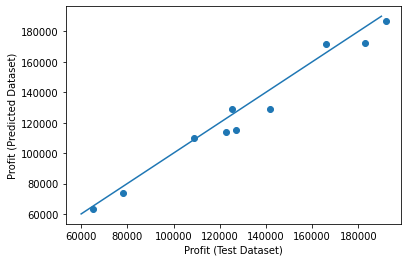

<IPython.core.display.Javascript object>

In [32]:
plt.scatter(Y_test, Y_pred)
plt.plot([60000, 190000], [60000, 190000])
plt.xlabel("Profit (Test Dataset)")
plt.ylabel("Profit (Predicted Dataset)")

In [38]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


<IPython.core.display.Javascript object>

In [39]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248549545


<IPython.core.display.Javascript object>